<a href="https://colab.research.google.com/github/bitanb1999/DaugBERT/blob/main/DAugBERT_consolidated_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-requisites:

In [1]:
!pip install tqdm==4.18.0
!pip install pyyaml==5.4.1
!pip3 install googletrans==3.1.0a0
!pip install --upgrade textblob
!pip install transformers
!pip install plotly


  Using cached tqdm-4.18.0-py2.py3-none-any.whl (48 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.12.3 requires tqdm>=4.27, but you have tqdm 4.18.0 which is incompatible.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.18.0 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.18.0 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.18.0 which is incompatible.
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.18.0
    Uninstalling tqdm-4.18.0:
      Successfully uninstalled tqdm-4.18.0


In [2]:
!pip install translate

In [3]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

import gensim
#from keras.preprocessing import text
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
import nltk
import json

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr


from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from IPython.display import display, HTML
from operator import itemgetter
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Add, Dot, Flatten
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [4]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
!pip install --upgrade plotly

In [7]:
import torch
from tqdm.notebook import tqdm

## Data Pre-Processing:

In [8]:
#helper function to load and convert json files into dataframes
def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            #Load sequentially and append to our local dataset dictionary.
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
diego=read_json("/content/drive/MyDrive/datajson/Diego.json")

In [11]:
diego.head()

,text,meta,_input_hash,_task_hash,_session_id,_view_id,answer
0,An increase in value of exports by 85percent t...,{'source': 'Pledges2016'},-1162694167,2001790693,None,blocks,accept
1,"The creation of a further 23,000 jobs in the a...",{'source': 'Pledges2016'},-1386471444,-502690585,None,blocks,accept
2,The Beef Data and Genomics Programme will spen...,{'source': 'Pledges2016'},1851219536,1246200737,None,blocks,accept
3,Fine Gael is also committed to a specific new ...,{'source': 'Pledges2016'},-1126934278,-1766556580,None,blocks,accept
4,We will introduce a new TAMS scheme aimed spec...,{'source': 'Pledges2016'},1676569615,1645174272,None,blocks,accept


In [12]:
#selecting the texts that are relevant for the causality prediction purpose
diego=diego[diego.meta=={'source': 'UNGD2020'}]

In [13]:
ria=read_json("/content/drive/MyDrive/datajson/Ria.json")
ria=ria[ria.meta=={'source': 'UNGD2020'}]
ria.head()

,text,meta,_input_hash,_task_hash,tokens,spans,_session_id,_view_id,answer
0,To be more concrete and direct - digital traci...,{'source': 'UNGD2020'},778122095,1161560288,"[{'text': 'To', 'start': 0, 'end': 2, 'id': 0,...","[{'start': 181, 'end': 279, 'token_start': 34,...",None,ner_manual,accept
1,I want Latvia to be a global role model for a ...,{'source': 'UNGD2020'},251829428,743517367,"[{'text': 'I', 'start': 0, 'end': 1, 'id': 0, ...",[],None,ner_manual,accept
2,V\tInfodemic,{'source': 'UNGD2020'},1900832657,-531652260,"[{'text': 'V', 'start': 0, 'end': 1, 'id': 0, ...",[],None,ner_manual,accept
3,Latvia is concerned that among other negative ...,{'source': 'UNGD2020'},-2038053410,632344576,"[{'text': 'Latvia', 'start': 0, 'end': 6, 'id'...","[{'start': 0, 'end': 161, 'token_start': 0, 't...",None,ner_manual,accept
4,Latvia has credible expertise and can contribu...,{'source': 'UNGD2020'},683081621,-1341340276,"[{'text': 'Latvia', 'start': 0, 'end': 6, 'id'...",[],None,ner_manual,accept


In [14]:
charumati=read_json("/content/drive/MyDrive/datajson/Charumati.json")
charumati=charumati[charumati.meta=={'source': 'UNGD2020'}]
charumati.head()

,text,meta,_input_hash,_task_hash,tokens,spans,_session_id,_view_id,answer
0,We must first identify the drivers of this tur...,{'source': 'UNGD2020'},-557005313,1410290401,"[{'text': 'We', 'start': 0, 'end': 2, 'id': 0,...","[{'start': 43, 'end': 50, 'token_start': 8, 't...",None,ner_manual,accept
1,The COVID-19 pandemic has done for us what Wor...,{'source': 'UNGD2020'},-2091410512,1476811753,"[{'text': 'The', 'start': 0, 'end': 3, 'id': 0...","[{'start': 102, 'end': 121, 'token_start': 20,...",None,ner_manual,accept
2,In the face of vulnerabilities exacerbated by ...,{'source': 'UNGD2020'},-316590318,-1679307505,"[{'text': 'In', 'start': 0, 'end': 2, 'id': 0,...","[{'start': 109, 'end': 127, 'token_start': 17,...",None,ner_manual,accept
3,"In Afghanistan, we are experimenting with how ...",{'source': 'UNGD2020'},-1733322617,1051816013,"[{'text': 'In', 'start': 0, 'end': 2, 'id': 0,...","[{'start': 302, 'end': 356, 'token_start': 55,...",None,ner_manual,accept
4,The same can be said for global attempts to ha...,{'source': 'UNGD2020'},1246482878,-795522050,"[{'text': 'The', 'start': 0, 'end': 3, 'id': 0...",[],None,ner_manual,accept


In [15]:
vishali=read_json("/content/drive/MyDrive/datajson/Vishali.json")
vishali=vishali[vishali.meta=={'source': 'UNGD2020'}]
vishali.head()

,text,meta,_input_hash,_task_hash,tokens,spans,_session_id,_view_id,answer
0,And during the unjust and unlawful blockade it...,{'source': 'UNGD2020'},2114867960,1022211010,"[{'text': 'And', 'start': 0, 'end': 3, 'id': 0...",[],None,ner_manual,accept
1,And based on our moral and legal responsibilit...,{'source': 'UNGD2020'},1364162466,-1191214300,"[{'text': 'And', 'start': 0, 'end': 3, 'id': 0...","[{'start': 17, 'end': 69, 'token_start': 4, 't...",None,ner_manual,accept
2,"On this occasion, I reiterate my deep apprecia...",{'source': 'UNGD2020'},1943246698,1326493834,"[{'text': 'On', 'start': 0, 'end': 2, 'id': 0,...",[],None,ner_manual,accept
3,There is an international consensus on the fai...,{'source': 'UNGD2020'},-868580516,2117219574,"[{'text': 'There', 'start': 0, 'end': 5, 'id':...",[],None,ner_manual,accept
4,A just and desired peace can only be achieved ...,{'source': 'UNGD2020'},-599509716,680926031,"[{'text': 'A', 'start': 0, 'end': 1, 'id': 0, ...","[{'start': 2, 'end': 24, 'token_start': 1, 'to...",None,ner_manual,accept


In [16]:
kindye=read_json("/content/drive/MyDrive/datajson/kindye.json")
kindye=kindye[kindye.meta=={'source': 'UNGD2020'}]
kindye.head()

,text,meta,_input_hash,_task_hash,tokens,spans,_session_id,_view_id,answer
0,"In Venezuela, I can tell you, there are all th...",{'source': 'UNGD2020'},1281152225,-152991428,"[{'text': 'In', 'start': 0, 'end': 2, 'id': 0,...",[],None,ner_manual,accept
1,"Even so, the Government of Washington, which h...",{'source': 'UNGD2020'},-1812602290,1655583135,"[{'text': 'Even', 'start': 0, 'end': 4, 'id': ...","[{'start': 657, 'end': 717, 'token_start': 113...",None,ner_manual,accept
2,"Authorities of the world,",{'source': 'UNGD2020'},-2028858340,-1311258700,"[{'text': 'Authorities', 'start': 0, 'end': 11...",[],None,ner_manual,accept
3,Here is Venezuela standing. With its historica...,{'source': 'UNGD2020'},-896663306,123777618,"[{'text': 'Here', 'start': 0, 'end': 4, 'id': ...",[],None,ner_manual,accept
4,Thank you very much.Your Excellency Volkan Boz...,{'source': 'UNGD2020'},-956738527,-1675700781,"[{'text': 'Thank', 'start': 0, 'end': 5, 'id':...",[],None,ner_manual,accept


In [17]:
d1=diego.merge(ria,how='inner',on='text')
du1=diego[~(diego.text.isin(d1.text))]
d2=diego.merge(charumati,how='inner',on='text')
du2=charumati[~(charumati.text.isin(d2.text))]
d3=diego.merge(vishali,how='inner',on='text')
du3=vishali[~(vishali.text.isin(d3.text))]
d1=d1[d1.answer_x==d1.answer_y][['text','tokens','spans','answer_y']]
d2=d2[d2.answer_x==d2.answer_y][['text','tokens','spans','answer_y']]
d3=d3[d3.answer_x==d3.answer_y][['text','tokens','spans','answer_y']]
df_u=pd.concat([du2,du3])
df_u=df_u[['text','tokens','spans','answer']]
df_u[(df_u.tokens==np.nan)&(df_u.spans==np.nan)]['spans']=[1 if y=='accept' else 0 for y in df_u.answer ]
df_u['spans']=[1 if len(y)>0 else 0 for y in df_u.spans]
d1['spans']=[1 if len(y)>0 else 0 for y in d1.spans]
d2['spans']=[1 if len(y)>0 else 0 for y in d2.spans]
d3['spans']=[1 if len(y)>0 else 0 for y in d3.spans]



In [18]:
d=d1.merge(d2,how='inner',on='text')
df=d.merge(d3,how='inner',on='text')
df=df[(df.spans_x==df.spans_y)&(df.tokens_x==df.tokens_y)&(df.tokens_y==df.tokens)][['text','tokens','spans']]
train=df
df=pd.concat([df,df_u[['text','tokens','spans']]])


In [19]:
df.reset_index(inplace=True)
df.to_json("/content/consolidated_json")
data=df
data.drop('index',axis=1,inplace=True)


## EDA

In [20]:
#funnel representation of the text and their corresponding class weightage
temp = data.groupby('spans').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')
fig = go.Figure(go.Funnelarea(
    text =temp.spans,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Causality Distribution"}
    ))
fig.show()

In [21]:
d=data

In [22]:
#obtaining common words in the consolidated unstemmed dataframe
d['temp_list'] = d['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in d['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,9648
1,of,5645
2,and,5458
3,to,4768
4,in,2565
5,a,1808
6,for,1519
7,is,1452
8,that,1434
9,our,1366


In [23]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
d['temp_list'] = d['temp_list'].apply(lambda x:remove_stopword(x))

In [25]:
top = Counter([item for sublist in d[d.spans==1]['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,We,199
2,international,160
3,global,156
4,COVID-19,147
5,pandemic,143
6,also,131
7,United,131
8,must,120
9,us,108
10,economic,103


In [26]:
top = Counter([item for sublist in d[d.spans==0]['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,The,458
2,United,451
3,I,430
4,international,379
5,Nations,321
6,UN,249
7,In,245
8,global,244
9,also,242
10,support,208


In [27]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [28]:
raw_text = [word for word_list in d['temp_list'] for word in word_list]

In [29]:
def words_unique(classification,numwords,raw_words):
    '''
    Input:
        classification - Segment category (ex. 'NonCausal');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the specific words and how many times it occurs in the chosen classification (in descending order based on their counts)..

    '''
    allother = []
    for item in d[d.spans!= classification]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in d[d.spans == classification]['temp_list']:
       for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [30]:
Unique_Positive= words_unique(1, 20, raw_text)
print("The top 20 unique words in Causal statements are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Causal statements are:


,words,count
0,dollars,5
1,sight,5
2,toll,5
3,sudden,4
4,disrupt,4
5,hopeful,4
6,consumption,4
7,accelerating,4
8,homes,4
9,worsened,4


In [31]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Causal Words')
fig.show()

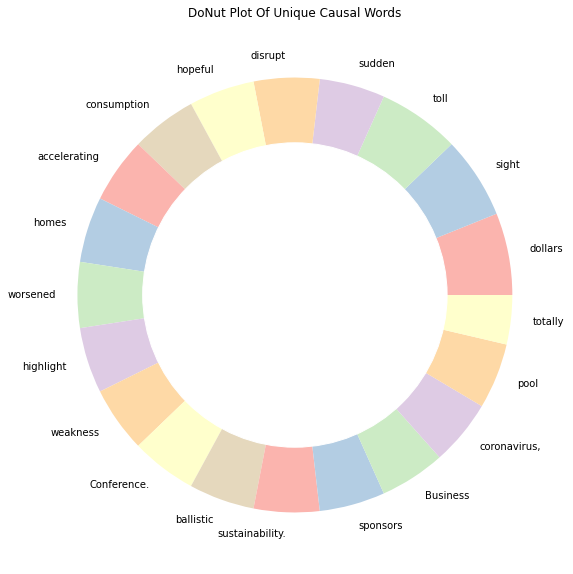

In [32]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Causal Words')
plt.show()

In [33]:
Unique_Negative= words_unique(0, 20, raw_text)
print("The top 10 unique words in No Effect words are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in No Effect words are:


,words,count
0,Heads,37
1,¥,30
2,Tijjani,27
3,Ladies,26
4,Western,23
5,-,22
6,Distinguished,21
7,"Bozkir,",18
8,"Gentlemen,",14
9,Bulgaria,14


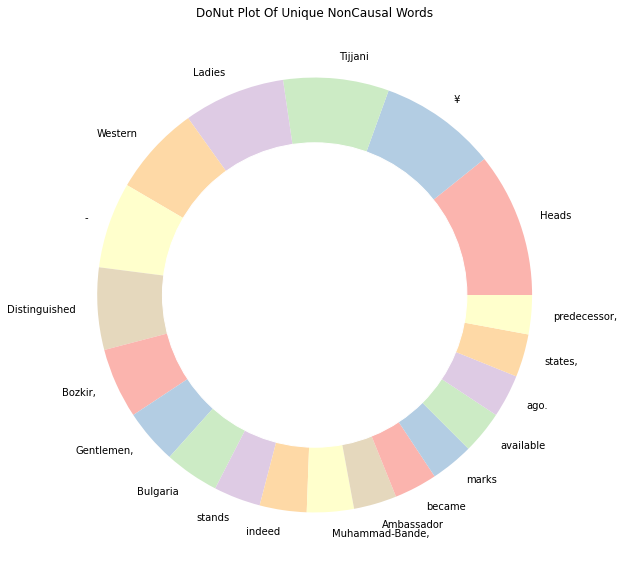

In [34]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique NonCausal Words')
plt.show()

In [35]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    return wordcloud

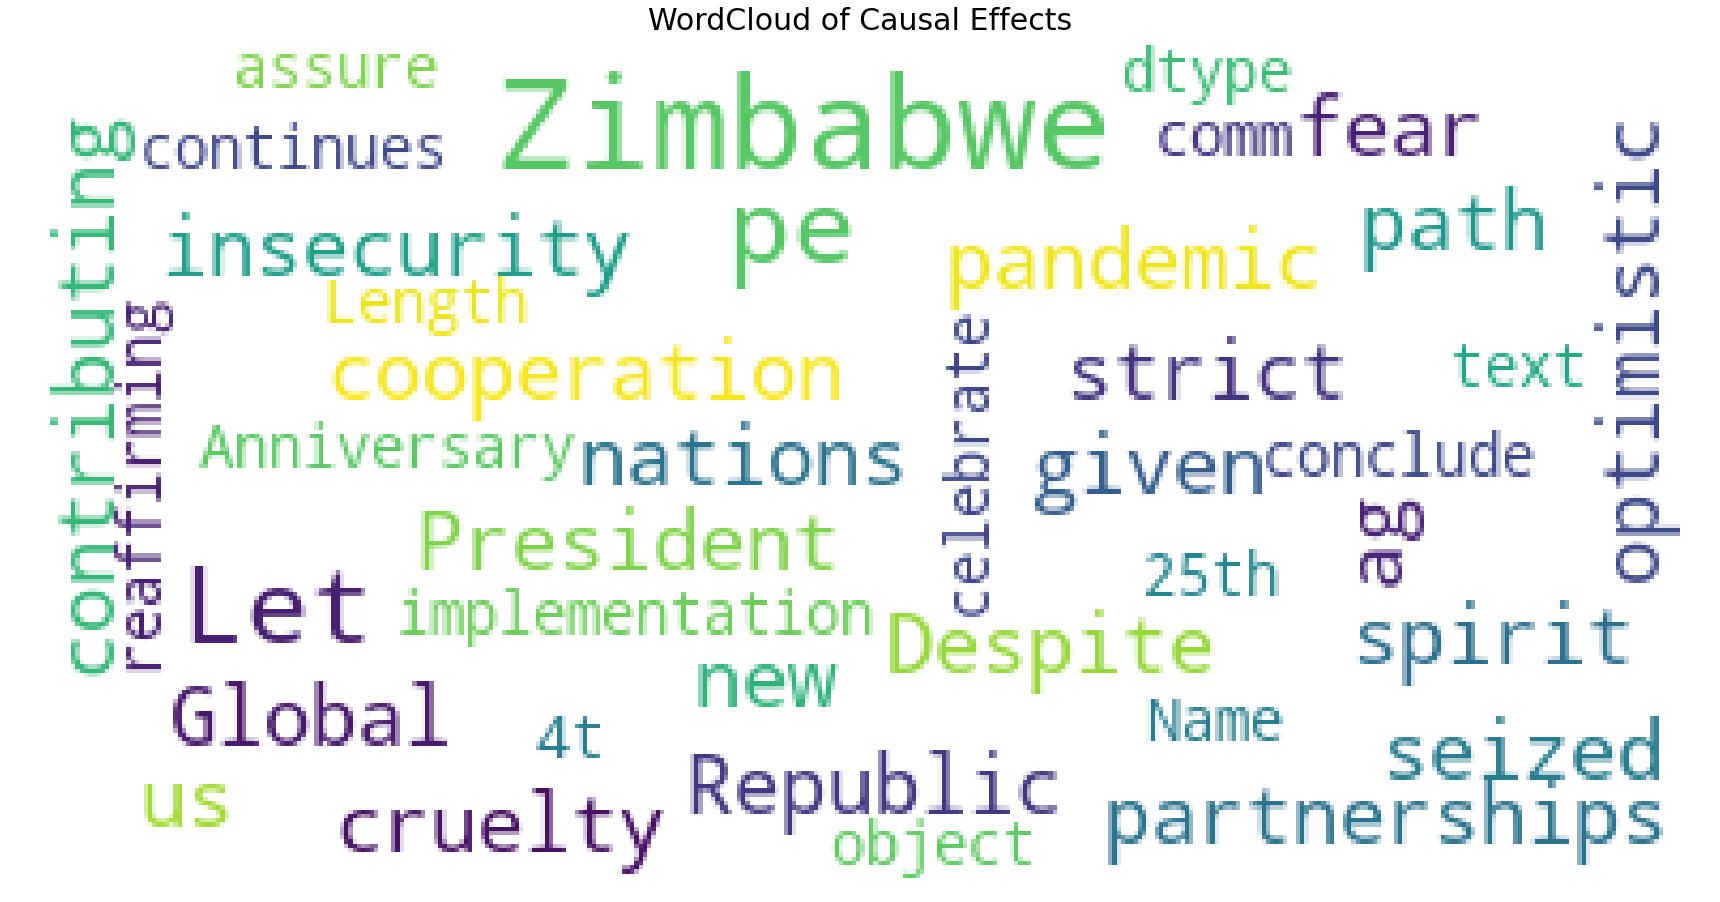

In [36]:
cloud=plot_wordcloud(d[d.spans==1].text,color='white',max_font_size=30,title_size=30,title="WordCloud of Causal Effects")

In [37]:
cloud.to_file('causal.png')

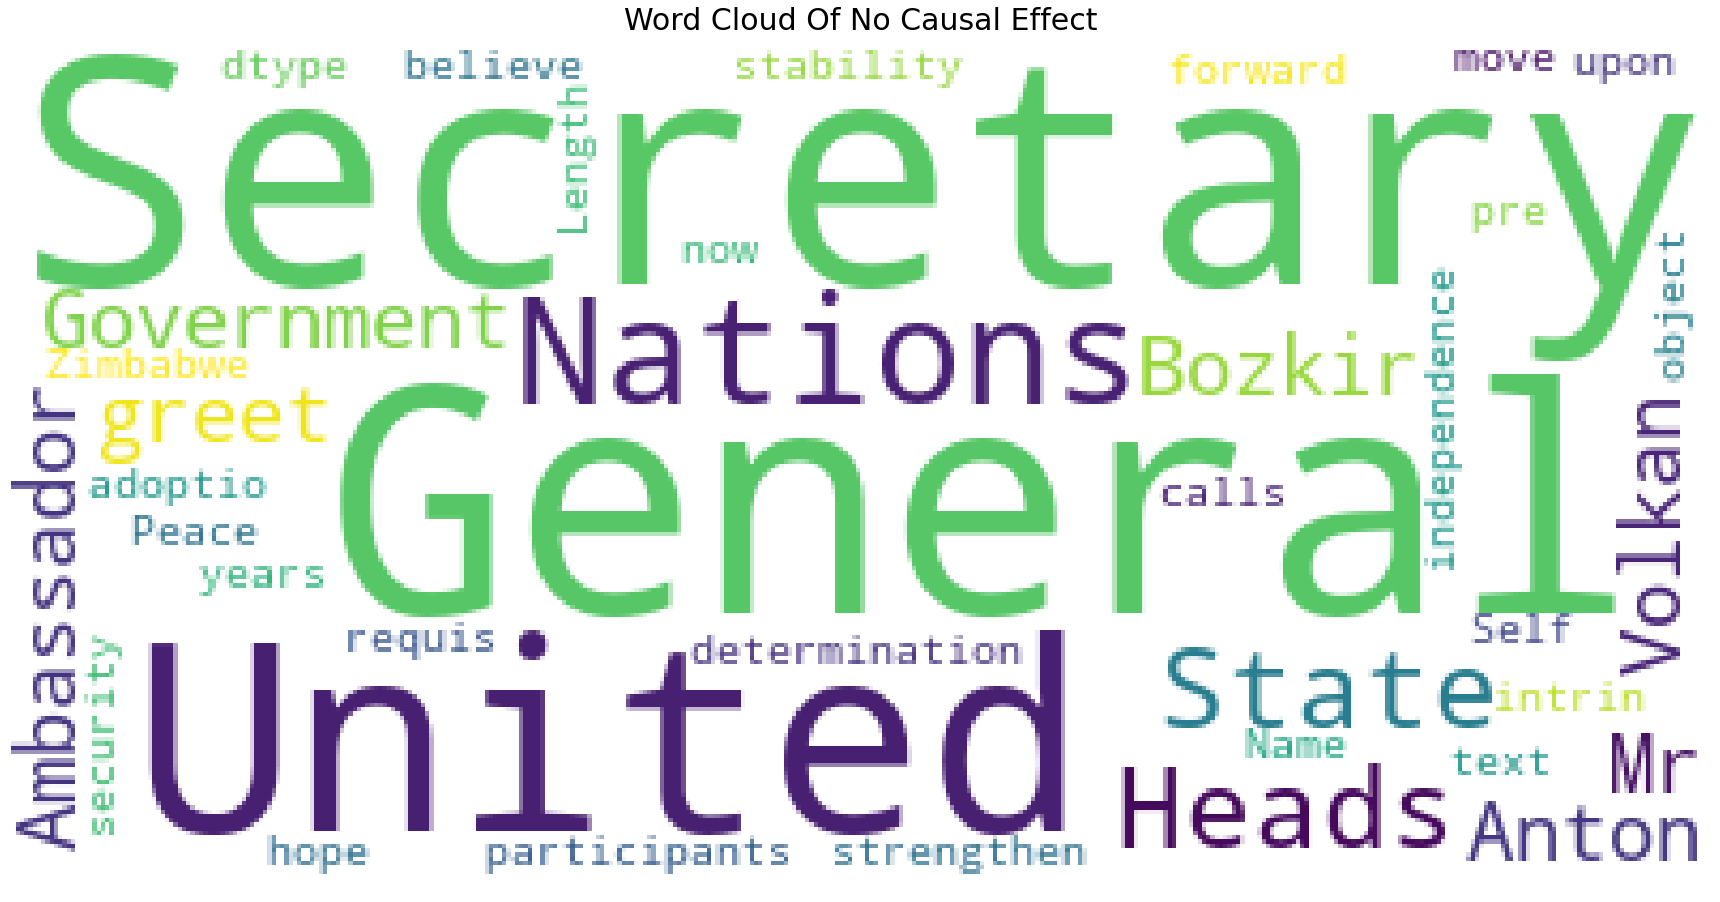

In [38]:
cloud2=plot_wordcloud(d[d.spans==0].text,title="Word Cloud Of No Causal Effect",title_size=30)
cloud2.to_file("NoCausal.png")

## Topic Modelling: </br>

Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
It can help with the following:
discovering the hidden themes in the collection.
classifying the documents into the discovered themes.
using the classification to organize/summarize/search the documents.

Therefore, by annotating the document, based on the topics predicted by the modeling method, we are able to optimize our search process.



In [39]:
df=df[['text','spans']]
df['annot']=['Cause' if y==1 else "No cause" for y in df.spans]
df.reset_index(inplace=True)



###LDA:</br>
We will use the gensim library for topic modeling with LDA. We import all things necessary to read in the data and transform it into a TF-IDF weighted bag-of-words format.</br>
TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term that occurs in the text has its respective TF and IDF score.
The product of the TF and IDF scores of a term is called the TF-IDF weight of that term. Put simply, the higher the TF*IDF score (weight), the rarer the term is in a given document and vice versa.

In [40]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary # create the dictionary/vocabulary from the data
from gensim.models.phrases import Phrases # join frequent phrases (collocations)

import time # to know how long training took
import multiprocessing # to speed things up by parallelizing

In [41]:
instances = df['text'].apply(str.split).tolist()
print(instances[0])

['Heads', 'of', 'State', 'and', 'Government,']


In [42]:
print("merging phrases", flush=True)
phrases = Phrases(instances, min_count=5, threshold=1)

merging phrases


In [43]:
instances_colloc = phrases[instances]
print(instances_colloc[0])

['Heads_of', 'State_and', 'Government,']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [44]:
print("creating dictionary", flush=True)
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances_colloc)
# get rid of words that are too rare or too frequent

print(dictionary, flush=True)

creating dictionary


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



Dictionary(16441 unique tokens: ['Government,', 'Heads_of', 'State_and', 'Antonio_Guterres,', 'Nations,']...)


In [45]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances_colloc]
print(ldacorpus[0])

translating corpus to IDs


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



[(0, 1), (1, 1), (2, 1)]


In [46]:
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)

# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]
print(model_corpus[0])

tf-idf transformation
[(0, 0.5990907567828074), (1, 0.5436269942224174), (2, 0.5878434794144634)]


In [47]:
len(model_corpus)

3205

In [48]:
coherence_values = []


for num_topics in range(2, 20):
    model = LdaMulticore(corpus=model_corpus[:], 
                         id2word=dictionary, 
                         num_topics=num_topics, 
                         random_state=42)

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances_colloc[:], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances_colloc[:], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



2 -1.9260888801022817 0.47285939773704055
3 -2.1304524810770293 0.4631670123597939
4 -2.113861076819766 0.4691969726594411
5 -3.368761983064588 0.4867117443590233
6 -3.4354969002683813 0.48387378549293203
7 -2.692891164110184 0.4787876120708008
8 -2.8193666529377133 0.492462557309826
9 -3.0831857460572123 0.464180925084199
10 -3.065391949427661 0.4850605422908923
11 -3.9425282205006695 0.4818133129851024
12 -3.9612892632368237 0.4834556005273251
13 -4.42646364422634 0.5034694170805576
14 -5.197775616970845 0.5060234013520151
15 -4.647199190981868 0.4961678696553829
16 -5.524988268140245 0.5055227312436167
17 -5.49790585680262 0.5128596871404223
18 -5.725318809541574 0.5092070845747233
19 -5.9814988528238375 0.5057665415082995


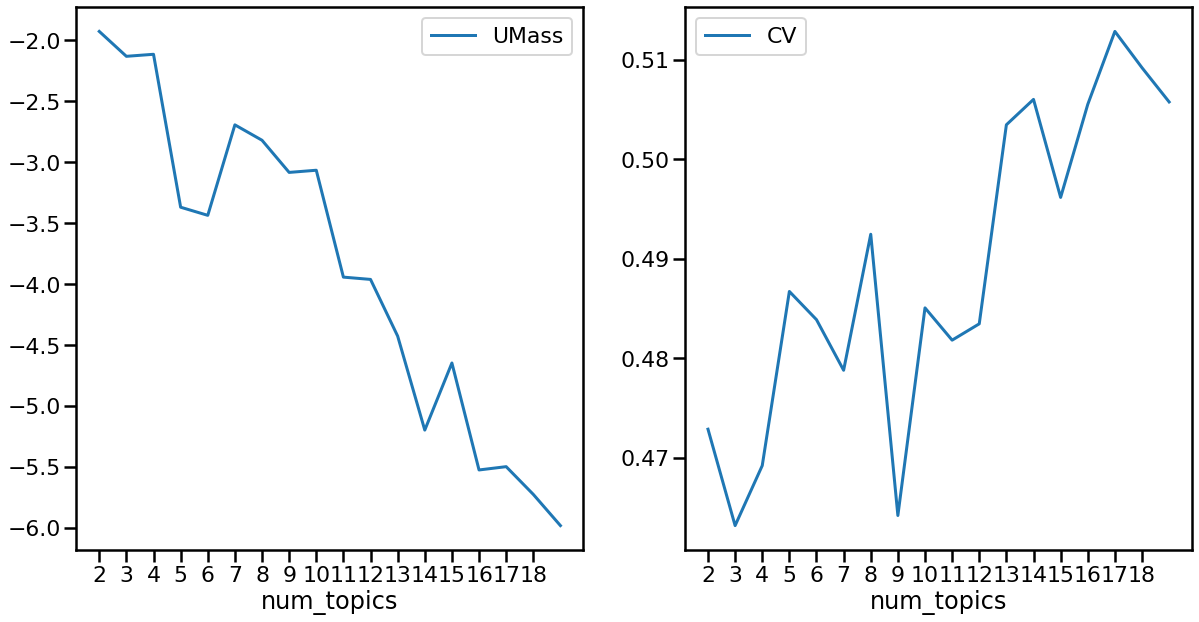

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('poster') # use large font

scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(2,19));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(2,19));

In [50]:
num_topics = 10

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5,
                     random_state=42
                    )
    
print("done in {}".format(time.time()-start), flush=True)

160.25
fitting model
done in 29.145972967147827


In [51]:

# transform the data into topic distros
topic_corpus = model[model_corpus]

topic_corpus[0]

[(0, 0.0742881),
 (1, 0.33140728),
 (2, 0.07428806),
 (3, 0.0742881),
 (4, 0.07428811),
 (5, 0.07428806),
 (6, 0.0742881),
 (7, 0.07428811),
 (8, 0.07428803),
 (9, 0.07428807)]

In [52]:
model.print_topics()

[(0,
  '0.004*"choice" + 0.003*"¥" + 0.003*"They" + 0.002*"joint" + 0.002*"well" + 0.002*"Action" + 0.002*"pursuit_of" + 0.002*"processes" + 0.002*"should_not" + 0.002*"business"'),
 (1,
  '0.006*"Heads_of" + 0.005*"Distinguished" + 0.004*"As_we" + 0.004*"State_and" + 0.003*"Zimbabwe" + 0.003*"a_future" + 0.003*"Your_Excellencies," + 0.003*"I_wish" + 0.002*"Government," + 0.002*"Yemeni"'),
 (2,
  '0.003*"most" + 0.002*"year" + 0.002*"pandemic" + 0.002*"towards" + 0.002*"people" + 0.002*"Tajikistan" + 0.002*"We_have" + 0.002*"was" + 0.002*"A" + 0.002*"The_United"'),
 (3,
  '0.003*"Thank_you" + 0.003*"Your" + 0.002*"against_the" + 0.002*"These" + 0.002*"countries_and" + 0.002*"General_Assembly," + 0.002*"Bozkir,_President" + 0.002*"for_your" + 0.002*"process" + 0.002*"why"'),
 (4,
  '0.003*"the_future" + 0.003*"to_all" + 0.003*"therefore" + 0.002*"wish_to" + 0.002*"build" + 0.002*"membership" + 0.002*"who_have" + 0.002*"Multilateralism" + 0.002*"efforts_in" + 0.002*"times."'),
 (5,
  '0.

In [53]:
import re

# get the topic descriptions
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=7)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:7]))
    descriptors.append(", ".join(m[1:5]).replace('"', ''))

1 "choice", "¥", "They", "joint", "well", "Action", "pursuit_of"
2 "Heads_of", "Distinguished", "As_we", "State_and", "Zimbabwe", "a_future", "Your_Excellencies,"
3 "most", "year", "pandemic", "towards", "people", "Tajikistan", "We_have"
4 "Thank_you", "Your", "against_the", "These", "countries_and", "General_Assembly,", "Bozkir,_President"
5 "the_future", "to_all", "therefore", "wish_to", "build", "membership", "who_have"
6 "of_the", "I_would", "President_of", "you", "like_to", "-", "the_United"
7 "Mr.", "President,", "Mr", "May", "Thank", "continued", "Chad"
8 "As_the", "Dear", "Human_Rights", "The_UN", "embargo", "to_respond", "ladies"
9 "the", "and", "to", "of", "our", "a", "in"
10 "Ladies_and", "climate_change", "African", "sustainable_development", "Sustainable_Development", "Government", "environmental"


In [54]:
target_category = 'annot'
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(topic_corpus))]

# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review category of each document (so we can aggregate)
topic_distros['category'] = df[target_category]

In [55]:
topic_distros.head()

,"¥, They, joint, well","Distinguished, As_we, State_and, Zimbabwe","year, pandemic, towards, people","Your, against_the, These, countries_and","to_all, therefore, wish_to, build","I_would, President_of, you, like_to","President,, Mr, May, Thank","Dear, Human_Rights, The_UN, embargo","and, to, of, our","climate_change, African, sustainable_development, Sustainable_Development",category
0,0.074288,0.331407,0.074288,0.074288,0.074288,0.074288,0.074288,0.074288,0.074288,0.074288,No cause
1,0.072249,0.072249,0.072249,0.072249,0.158539,0.075936,0.072249,0.072249,0.259781,0.072249,No cause
2,0.078151,0.078150,0.078145,0.078151,0.078151,0.171319,0.203496,0.078151,0.078140,0.078146,No cause
3,0.068450,0.068450,0.068449,0.143271,0.068450,0.183248,0.131483,0.068450,0.072215,0.127536,No cause
4,0.048910,0.048904,0.112417,0.048907,0.070308,0.111209,0.048908,0.048912,0.392467,0.069059,No cause


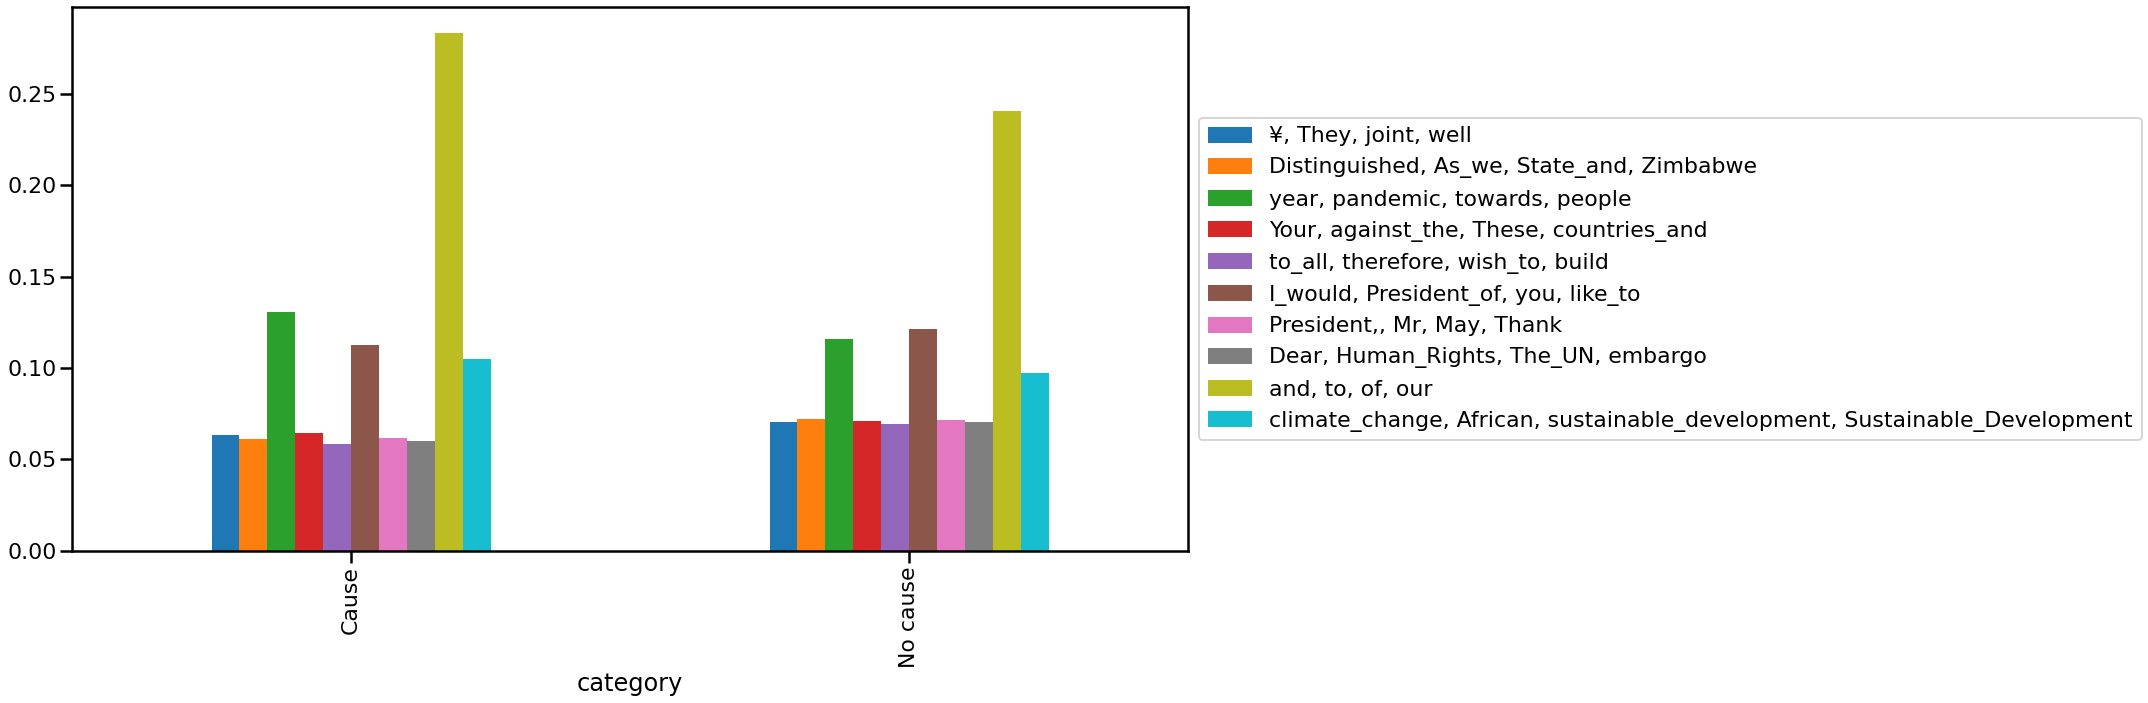

In [56]:
seaborn.set_context('poster') # use large font
fig, ax = plt.subplots(figsize=(20, 10)) # set graph size

# aggregate topics by categories
aggregate_by_category = topic_distros.groupby(topic_distros.category).mean()

# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);

# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

###Author Topic Model: </br>
The author-topic model is an extension of Latent Dirichlet Allocation (LDA), that allows us to learn topic representations of authors in a corpus. The model can be applied to any kinds of labels on documents, such as tags on posts on the web. The model can be used as a novel way of data exploration, as features in machine learning pipelines, for author (or tag) prediction, or to simply leverage your topic model with existing metadata.

In [57]:
from gensim.models import AuthorTopicModel
from gensim.test.utils import datapath, temporary_file

In [58]:
from collections import defaultdict

# mapping from annotations to document ID
author2doc = defaultdict(list)

i = 0

author_model_corpus = []
author_instances = []
for doc, tfidf_doc, annot in zip(instances_colloc, ldacorpus, df.annot):
    if len(tfidf_doc) > 0:
        author_model_corpus.append(tfidf_doc)
        author2doc[annot].append(i)
        author_instances.append(doc)
        i += 1
    
len(author2doc), len(author_model_corpus), len(author_instances)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



(2, 3205, 3205)

In [59]:
author2doc['Cause'][:10]

[8, 12, 15, 16, 18, 20, 21, 26, 27, 38]

In [60]:
coherence_values = []
author_model_list = []



dev_author2doc = {key: [idx for idx in value] for key, value in author2doc.items()}

for num_topics in range(5, 20):
    author_model = AuthorTopicModel(corpus=author_model_corpus[:], 
                                    author2doc=dev_author2doc, 
                                    id2word=dictionary, 
                                    num_topics=num_topics,
                                    random_state=42
                                   )
    
    coherencemodel_umass = CoherenceModel(model=author_model, 
                                          texts=author_instances[:], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=author_model, 
                                       texts=author_instances[:], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

5 -7.101285320211735 0.4909752804688746
6 -6.160985829998803 0.5444353049756127
7 -3.7626296966544346 0.4887837741059685
8 -3.7452904594255934 0.511550191646578
9 -4.108034508343621 0.5017699415850897
10 -3.5760952657200837 0.49012409000765694
11 -3.950948825132183 0.5200862114157583
12 -3.7276126119346777 0.5156596085302062
13 -4.048775499509263 0.5071438982769838
14 -4.311336825886799 0.5654482042420843
15 -4.2049727678554545 0.5442381187660589
16 -4.405639675090353 0.5545181507411063
17 -4.397804716781684 0.5431848399212431
18 -4.513353385222964 0.5365109128945182
19 -4.32895277904881 0.5226308973794083


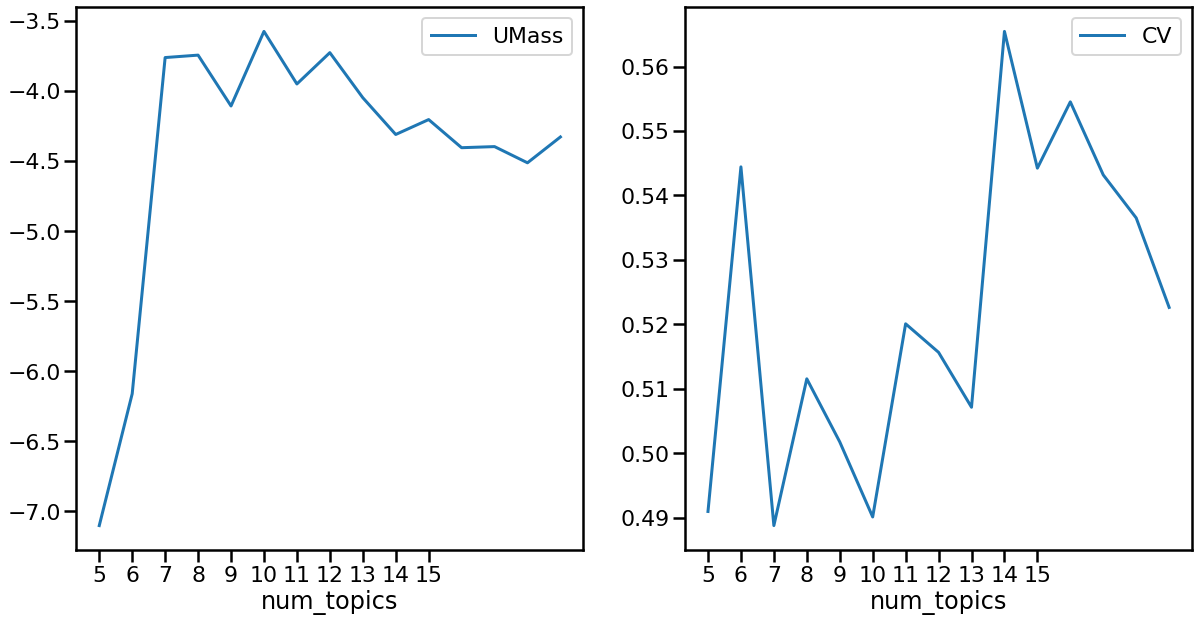

In [61]:
%matplotlib inline
scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(5,16));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(5,16));

In [62]:
n_topics_author = 5

author_model = AuthorTopicModel(corpus=author_model_corpus, 
                                author2doc=author2doc, 
                                id2word=dictionary, 
                                num_topics=n_topics_author,
                                passes=num_passes,
                                chunksize=chunk_size,
                                random_state=42
)

In [63]:
# extract a list of tuples with topic number and descriptors from the model
author_model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                author_model.print_topics(num_topics=n_topics_author, num_words=7)]

author_descriptors = []
for i, m in sorted(author_model_topics):
    print(i+1, ", ".join(m[:7]))
    author_descriptors.append(", ".join(m[1:5]).replace('"', ''))

1 "and", "the", "to", "of_the", "of", "in", "for"
2 "sustainable", "serious", "greater", "We_call", "between_the", "natural", "population"
3 "International", "terrorists", "imposed", "nation", "Conference_on", "sector", "Serbia"
4 "better", "towards", "multilateralism", "and_security", "conclude", "genuine", "international_law."
5 "multilateralism_and", "reforms", "particularly_in", "independence", "just", "strengthen", "ending"


In [64]:
# initialize mapping from covariate to topic distro, set all to 0.0
author_vecs = {author: {author_descriptors[t]: 0.0
                         for t in range(author_model.num_topics)}
              for author in author_model.id2author.values()
              }
# update mappings from model
for author in author_model.id2author.values():
    for (t, v) in author_model.get_author_topics(author):
        author_vecs[author][author_descriptors[t]] = v

In [65]:
for annot in ['Cause','No cause']:
    print(annot, author_vecs[annot])

Cause {'the, to, of_the, of': 0.5515927798036879, 'serious, greater, We_call, between_the': 0.06135775174277246, 'terrorists, imposed, nation, Conference_on': 0.020141854062275404, 'towards, multilateralism, and_security, conclude': 0.2406064913755331, 'reforms, particularly_in, independence, just': 0.12630112301573118}
No cause {'the, to, of_the, of': 0.6644372398385443, 'serious, greater, We_call, between_the': 0.14297781246429306, 'terrorists, imposed, nation, Conference_on': 0.0, 'towards, multilateralism, and_security, conclude': 0.07820910099782254, 'reforms, particularly_in, independence, just': 0.10993843799154188}


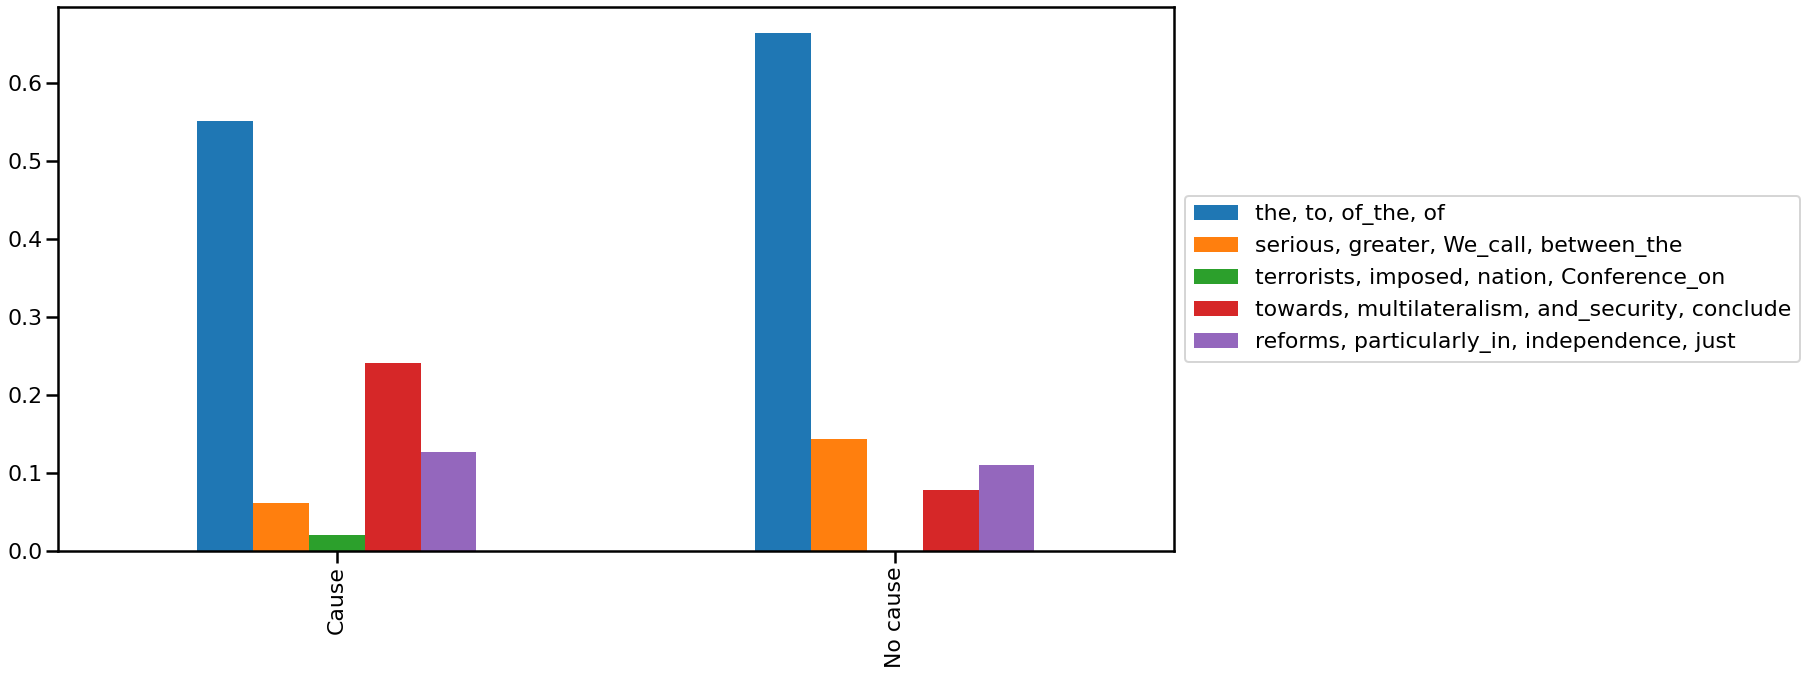

In [66]:
# make a DataFrame
author_df = pd.DataFrame.from_dict(author_vecs)

# plot it
fig, ax = plt.subplots(figsize=(20,10))
author_df.T.plot.bar(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

##BERT Base Implementation:

### Pre-processing :

In [ ]:
data.drop(['tokens','temp_list'],axis=1,inplace=True)
data['spans']=['Cause' if y==1 else 'No Cause' for y in data.spans]
data['spans'][:1000].value_counts()#for visualisation purpose


No Cause    785
Cause       215
Name: spans, dtype: int64

The dataset is imbalanced and hence needs balancing. We balance it.

In [ ]:
#for convenience checkpoint
data.to_pickle("/content/UNnon_augmented")
data=pd.read_pickle("/content/UNnon_augmented")


In [ ]:
data['spans']=[1 if y=='Cause' else 0 for y in data.spans]

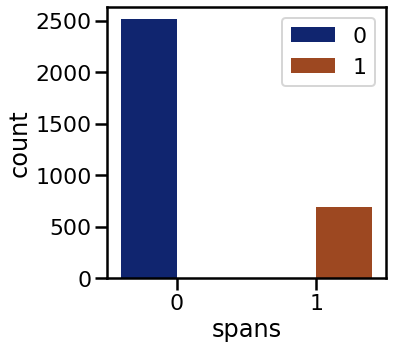

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(x=data["spans"],hue = data["spans"],palette = 'dark')
plt.legend(loc = 'upper right')
plt.show()

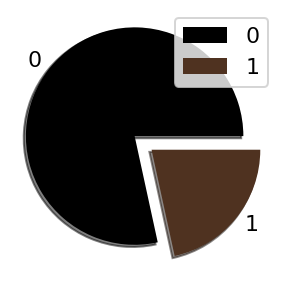

In [ ]:
labels = [0,1]
sizes = data["spans"].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,colors = colors,shadow = True,explode = explode)
plt.legend()
plt.show()

In [ ]:
data.head()

,text,spans
0,"Heads of State and Government,",0
1,"Secretary-General of the United Nations, Anton...",0
2,Ambassador Volkan Bozkir;,0
3,"Secretary General of the United Nations, Mr. A...",0
4,"I greet all participants, with the hope that t...",0


In [ ]:
#stemming and generalising the words for easier workflow
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words("english"))
stemer = PorterStemmer()
def remove_SW_Stem(text):
 text=[stemer.stem(words) for words in text.split(" ") if words not in stop_words]
 return " ".join(text)
special_chars = re.compile("#+_]")
add_space = re.compile("[/(){}\[\]\\@;]")
def clean_text(text):
 text=text.lower()
 text = add_space.sub(" ",text)
 text = special_chars.sub(" ",text)
 text = remove_SW_Stem(text)
 return text
data['text'] = data['text'].apply(lambda text:clean_text(text))
data.head()

,text,spans
0,"head state government,",0
1,"secretary-gener unit nations, antonio guterres,",0
2,ambassador volkan bozkir,0
3,"secretari gener unit nations, mr. antonio gute...",0
4,"greet participants, hope sui generi meet one d...",0


In [ ]:
data

,text,spans
0,"head state government,",0
1,"secretary-gener unit nations, antonio guterres,",0
2,ambassador volkan bozkir,0
3,"secretari gener unit nations, mr. antonio gute...",0
4,"greet participants, hope sui generi meet one d...",0
...,...,...
3200,"15 year sinc adopt ezulwini consensus, reaffir...",0
3201,"peace, secur stabil pre-requisit sustain devel...",0
3202,self-determin independ intrins fundament right...,0
3203,zimbabw also call upon secretary-gener appoint...,0


###Language Translation:

In [ ]:
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()

In [ ]:
from textblob import TextBlob
from textblob.translate import NotTranslated
import random

sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]
#back-translation using Google translate package
def data_augmentationGoogle(message, language, aug_range=1):
    augmented_messages = []
    #if hasattr(message, "decode"):
        #message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        try:
            
            text = translator.translate(message, dest=sr.choice(language)).text   ## Converting to random langauge for meaningful variation
            newtext = translator.translate(text, dest="en").text
        except NotTranslated:
            pass
        augmented_messages.append(str(newtext))

    return augmented_messages

In [ ]:
#back-translation using python translate package
from translate import Translator
def data_augmentationPy(message, language, aug_range=1):
    augmented_messages = []
    #if hasattr(message, "decode"):
        #message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        try:
            translator=Translator(to_lang=sr.choice(language))
            text = translator.translate(message)   ## Converting to random langauge for meaningful variation
            translator2=Translator(to_lang="en")
            newtext = translator2.translate(text)
        except NotTranslated:
            pass
        augmented_messages.append(str(newtext))

    return augmented_messages

In [ ]:
#back-translation using TextBlob package (currently under updation due to issues in Google API access)
#https://github.com/sloria/TextBlob/issues/395
#https://github.com/RomanKornev/Translate/issues/1
def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        text = TextBlob(message)
        try:
            text = text.translate(to=sr.choice(language))   ## Converting to random langauge for meaningful variation
            text = text.translate(to="en")
        except NotTranslated:
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [ ]:
intent_count = data.spans.value_counts().to_dict()

In [ ]:
## Get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(intent_count.items(), key=operator.itemgetter(1))[1]


In [ ]:
import math
import tqdm

Googledf = pd.DataFrame()
for intent, count in intent_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(data[data["spans"] == intent]["text"]) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['text'])
            dummy1["spans"] = intent
            old_message_df = old_message_df.append(dummy1)
            
            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentationGoogle(message, language, multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['text'])
            dummy2["spans"] = intent
            new_message_df = new_message_df.append(dummy2)
        
        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points
        Googledf = Googledf.append([old_message_df,new_message_df])
    else :
        Googledf = Googledf.append(data[data["spans"] == intent])

100%|██████████| 692/692 [25:14<00:00,  2.19s/it]


In [ ]:
Pydf = pd.DataFrame()
for intent, count in intent_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(data[data["spans"] == intent]["text"]) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['text'])
            dummy1["spans"] = intent
            old_message_df = old_message_df.append(dummy1)
            
            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentationPy(message, language, multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['text'])
            dummy2["spans"] = intent
            new_message_df = new_message_df.append(dummy2)
        
        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points
        Pydf = Pydf.append([old_message_df,new_message_df])
    else :
        Pydf = Pydf.append(data[data["spans"] == intent])

100%|██████████| 692/692 [08:05<00:00,  1.43it/s]


In [ ]:
newdf = pd.DataFrame()
for intent, count in intent_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(data[data["spans"] == intent]["text"]) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['text'])
            dummy1["spans"] = intent
            old_message_df = old_message_df.append(dummy1)
            
            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentation(message, language, multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['text'])
            dummy2["spans"] = intent
            new_message_df = new_message_df.append(dummy2)
        
        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points
        newdf = newdf.append([old_message_df,new_message_df])
    else :
        newdf = newdf.append(data[data["spans"] == intent])

In [91]:
Pydf.to_csv("/content/UNbalancedPy")
Pydf=pd.read_csv("/content/UNbalancedPy").drop("Unnamed: 0",axis=1)
Googledf.to_csv("/content/UNbalancedGoogle")
Googledf=pd.read_csv("/content/UNbalancedGoogle").drop("Unnamed: 0",axis=1)


In [75]:
newdf.to_csv("/content/UNbalanced")
newdf=pd.read_csv("/content/UNbalanced").drop("Unnamed: 0",axis=1)


###BERT Implementation using TextBlob translated data:

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newdf.index.values,
                                                newdf.spans.values,
                                                test_size = 0.5,
                                                random_state=17,
                                                stratify=newdf.spans.values
                                                )

In [77]:
newdf.loc[X_train,'data_type'] = 'train'
newdf.loc[X_test,'data_type'] = 'test'
newdf.head()


,text,spans,data_type
0,"head state government,",0,train
1,"secretary-gener unit nations, antonio guterres,",0,test
2,ambassador volkan bozkir,0,test
3,"secretari gener unit nations, mr. antonio gute...",0,train
4,"greet participants, hope sui generi meet one d...",0,test


In [78]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [79]:
encoder_train = tokenizer.batch_encode_plus(newdf[newdf["data_type"]=='train'].text.values,
                                           add_special_tokens = True,
                                          
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')



encoder_test = tokenizer.batch_encode_plus(newdf[newdf["data_type"]=='test'].text.values,
                                           add_special_tokens = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(newdf[newdf['data_type']=='train'].spans.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(newdf[newdf['data_type']=='test'].spans.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [80]:
possible_label = newdf.spans.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{0: 0, 1: 1}

In [81]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = len(dict_label),
                                     output_attentions = False,
                                     output_hidden_states =  False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [82]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

In [83]:
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)

In [84]:
from transformers import AdamW,get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

In [85]:
from sklearn.metrics import f1_score 

def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

In [86]:
def accuracy_per_class(preds,labels):
    label_dict_reverse = {v:k for k,v in dict_label.items()}
    
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

In [87]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [88]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Loading:{device}")

Loading:cuda


In [89]:
def evaluate(dataloader_val):
    model.eval()
    
    loss_val_total = 0
    predictions,true_vals = [],[]
    
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
        
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0) 
    return loss_val_avg,predictions,true_vals
            

In [ ]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#       logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
        
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})

    
    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avg}')
    val_loss,predictions,true_vals = evaluate(dataloader_test)
    test_score = f1_score_func(predictions,true_vals)
    tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/158 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.039947270597714364


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8893067291643046
 Test Score:0.8329017002977409


Epoch: 2:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.03473445247321631


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8702997589790369
 Test Score:0.8366457955186531


Epoch: 3:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.02991196496597833


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.868331158462959
 Test Score:0.8366457955186531


Epoch: 4:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.03624320416667062


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8686980929555772
 Test Score:0.8366457955186531


Epoch: 5:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.0309596650591238


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8722484385288214
 Test Score:0.8366457955186531


Epoch: 6:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.0294881105495549


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8687749417377871
 Test Score:0.8366457955186531


Epoch: 7:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.031435104709780254


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8694182159025458
 Test Score:0.8366457955186531


Epoch: 8:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.03088049937475803


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8718064012406748
 Test Score:0.8366457955186531


Epoch: 9:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.03105695989672566


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8677521750708169
 Test Score:0.8366457955186531


Epoch: 10:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.03030611590196414


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.8733090354671961
 Test Score:0.8366457955186531


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
_,predictions,true_vals = evaluate(dataloader_test)

  0%|          | 0/79 [00:00<?, ?it/s]

In [ ]:
accuracy_per_class(predictions,true_vals)

Class:{0: 0, 1: 1}
Accuracy:1007/1256

Class:{0: 0, 1: 1}
Accuracy:1096/1257



In [ ]:
print("Predicts No causality with an accuracy of : ",1097*100/1256)
print("Predicts causality with an accuracy of : ",1096*100/1257)
print("Prediction accuracy on average : ",(1097+1096)*100/(1256+1257))

Predicts No causality with an accuracy of :  87.3407643312102
Predicts causality with an accuracy of :  87.19172633253778
Prediction accuracy on average :  87.26621567847195


### BERT implementation with Google Translate package:

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Googledf.index.values,
                                                Googledf.spans.values,
                                                test_size = 0.5,
                                                random_state=17,
                                                stratify=Googledf.spans.values
                                                )
Googledf.loc[X_train,'data_type'] = 'train'
Googledf.loc[X_test,'data_type'] = 'test'

In [25]:
encoder_train = tokenizer.batch_encode_plus(Googledf[Googledf["data_type"]=='train'].text.values,
                                           add_special_tokens = True,
                                          
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')



encoder_test = tokenizer.batch_encode_plus(Googledf[Googledf["data_type"]=='test'].text.values,
                                           add_special_tokens = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(Googledf[Googledf['data_type']=='train'].spans.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(Googledf[Googledf['data_type']=='test'].spans.values)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [26]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

In [27]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#       logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
                
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})

    
    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avgGoogle = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avgGoogle}')
    val_lossGoogle,predictionsGoogle,true_valsGoogle = evaluate(dataloader_test)
    test_scoreGoogle = f1_score_func(predictionsGoogle,true_valsGoogle)
    tqdm.write(f'Val Loss:{val_lossGoogle}\n Test Score:{test_scoreGoogle}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/158 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.6073232406302344


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.5438533994970443
 Test Score:0.7337213646433677


Epoch: 2:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.526829384173019


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.49902796066260036
 Test Score:0.7506019063718861


Epoch: 3:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.4254774528590939


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.5084753813622873
 Test Score:0.7704052535877006


Epoch: 4:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.28627923644984826


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.4256427039073992
 Test Score:0.8303605227630595


Epoch: 5:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.20496786152354524


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6363779208092373
 Test Score:0.7829794873044915


Epoch: 6:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.14251924557847123


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.4994736476506613
 Test Score:0.8485345078127513


Epoch: 7:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.09169304168111161


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6036869729810124
 Test Score:0.8465377043821584


Epoch: 8:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.07315367881851152


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.7618293243495724
 Test Score:0.8291174021569563


Epoch: 9:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.05332543764004036


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.690126907410501
 Test Score:0.8542712924765953


Epoch: 10:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.04491198608059365


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6712333403433426
 Test Score:0.8593487540124856


In [28]:
_,predictionsGoogle,true_valsGoogle = evaluate(dataloader_test)


  0%|          | 0/79 [00:00<?, ?it/s]

In [29]:
accuracy_per_class(predictionsGoogle,true_valsGoogle)


Class:{0: 0, 1: 1}
Accuracy:976/1256

Class:{0: 0, 1: 1}
Accuracy:1186/1257



### BERT implementation using Python Translate package:

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Pydf.index.values,
                                                Pydf.spans.values,
                                                test_size = 0.5,
                                                random_state=17,
                                                stratify=Pydf.spans.values
                                                )
Pydf.loc[X_train,'data_type'] = 'train'
Pydf.loc[X_test,'data_type'] = 'test'

In [40]:
encoder_train = tokenizer.batch_encode_plus(Pydf[Pydf["data_type"]=='train'].text.values,
                                           add_special_tokens = True,
                                          
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')



encoder_test = tokenizer.batch_encode_plus(Pydf[Pydf["data_type"]=='test'].text.values,
                                           add_special_tokens = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(Pydf[Pydf['data_type']=='train'].spans.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(Pydf[Pydf['data_type']=='test'].spans.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [41]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

In [46]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#       logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
                
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})

    
    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avgPy = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avgPy}')
    val_lossPy,predictionsPy,true_valsPy = evaluate(dataloader_test)
    test_scorePy = f1_score_func(predictionsPy,true_valsPy)
    tqdm.write(f'Val Loss:{val_lossPy}\n Test Score:{test_scorePy}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/158 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.35212213760595534


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.2988382645800144
 Test Score:0.8588343216376976


Epoch: 2:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.2867967849479446


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.2792784580135647
 Test Score:0.8646926434800345


Epoch: 3:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.23205400021345932


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.3345761074672771
 Test Score:0.8695704429716047


Epoch: 4:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.20386183133372401


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.365619974140125
 Test Score:0.8705489668812808


Epoch: 5:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.1514862802917067


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.4423774755265139
 Test Score:0.8678667460950757


Epoch: 6:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.07829380373446908


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6266083586135809
 Test Score:0.8397440109322293


Epoch: 7:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.06296279372741716


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.5815933974389034
 Test Score:0.8566534058388836


Epoch: 8:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.036733982979933015


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6301478341434009
 Test Score:0.8579339945146339


Epoch: 9:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.029311198984343513


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6398889053660103
 Test Score:0.8582980108305626


Epoch: 10:   0%|          | 0/158 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.019780383680363573


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.6536571377817588
 Test Score:0.8587079559347957


In [47]:
_,predictionsPy,true_valsPy = evaluate(dataloader_test)


  0%|          | 0/79 [00:00<?, ?it/s]

In [48]:
accuracy_per_class(predictionsPy,true_valsPy)


Class:{0: 0, 1: 1}
Accuracy:1096/1256

Class:{0: 0, 1: 1}
Accuracy:1062/1257



### Bert Implementation with Non-Augmented Data:

In [67]:
nondf=pd.read_pickle("/content/UNnon_augmented")

In [68]:
nondf.head()

,text,spans
0,"Heads of State and Government,",No Cause
1,"Secretary-General of the United Nations, Anton...",No Cause
2,Ambassador Volkan Bozkir;,No Cause
3,"Secretary General of the United Nations, Mr. A...",No Cause
4,"I greet all participants, with the hope that t...",No Cause


In [69]:
nondf.spans=[0 if y=='No Cause' else 1 for y in nondf.spans]

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(nondf.index.values,
                                                nondf.spans.values,
                                                test_size = 0.5,
                                                random_state=17,
                                                stratify=nondf.spans.values
                                                )
nondf.loc[X_train,'data_type'] = 'train'
nondf.loc[X_test,'data_type'] = 'test'

In [94]:
encoder_train = tokenizer.batch_encode_plus(nondf[nondf["data_type"]=='train'].text.values,
                                           add_special_tokens = True,
                                          
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')



encoder_test = tokenizer.batch_encode_plus(nondf[nondf["data_type"]=='test'].text.values,
                                           add_special_tokens = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(nondf[nondf['data_type']=='train'].spans.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(nondf[nondf['data_type']=='test'].spans.values)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [95]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

In [96]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#       logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
                
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})

    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avgNon = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avgNon}')
    val_lossNon,predictionsNon,true_valsNon = evaluate(dataloader_test)
    test_scoreNon = f1_score_func(predictionsNon,true_valsNon)
    tqdm.write(f'Val Loss:{val_lossNon}\n Test Score:{test_scoreNon}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/101 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.5432106250583535


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.45789849465968563
 Test Score:0.689288440816825


Epoch: 2:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.43560816863975904


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.4295999805132548
 Test Score:0.7633564339590541


Epoch: 3:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.3594293051426954


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.4578949625001234
 Test Score:0.7657802410612179


Epoch: 4:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.29178521981333744


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.4759567619538775
 Test Score:0.7799186325828271


Epoch: 5:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.2190116961108576


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.535634806635333
 Test Score:0.7710908024064198


Epoch: 6:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.16035762314896773


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.5700130722686356
 Test Score:0.7717080867503617


Epoch: 7:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.10417082298104421


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.6725462195920009
 Test Score:0.7713436021031954


Epoch: 8:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.08173680926977407


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.7716414501854018
 Test Score:0.7692426830952324


Epoch: 9:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.06423790664365976


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.7897155372535481
 Test Score:0.767884143201997


Epoch: 10:   0%|          | 0/101 [00:00<?, ?it/s]


Epoch {epoch}
Training Loss: 0.0497695203308053


  0%|          | 0/51 [00:00<?, ?it/s]

Val Loss:0.7696029204948276
 Test Score:0.7677384819246206


In [97]:
_,predictionsNon,true_valsNon = evaluate(dataloader_test)


  0%|          | 0/51 [00:00<?, ?it/s]

In [98]:
accuracy_per_class(predictionsNon,true_valsNon)


Class:{0: 0, 1: 1}
Accuracy:1095/1257

Class:{0: 0, 1: 1}
Accuracy:144/346

